We are looking at a data set for various metal alloys. I used to do some machine shop work with my friends in undergrad and in high school, where I would make props for them to bring to various conventions. However, you can't make a sword out of only EVA/styrene foam unless you want a broken foam sword, so you need some steel components to reinforce it (and also so that your friends aren't tempted to swing it around all the time). I use aluminum, but suppose for a second that the only metal I could find at Home Depot was steel, and that instead of telling me what grade of steel, like say SAE 1040, Home Depot had a mass spectrometer instead.

Odd, I know, but that would be pretty fun for me and probably only me.

Props and jokes aside, if I were to make a metal object for hobbyist work, I would need to know some properties of the steel that I am using, so that I don't use the wrong kind of steel. Most of the time, a plain low-carbon steel off the rack works fine. Sometimes, you don't want your steel failing prematurely.

Knowing what kind of steel also helps with machining it. If your steel is very hard, you'd probably want to use a carbide cutting tool instead of a stainless steel cutting tool, unless you want to be swapping cutting tools constantly. If your steel is very, very hard, a plain steel cutting tool isn't going to cut something harder than itself.

However, currently the only way to test your steel is to take a sample and subject it to physical destruction. This takes time, and testing equipment. Wouldn't it be nice if we could try to predict the capabilities of the steel from its elemental composition? 

We thus have a large dataset from Kaggle (https://www.kaggle.com/rohannemade/mechanical-properties-of-low-alloy-steels) where we have a large list of mechanical properties of various kinds of low-alloy steel. For my purposes, I want to know when the steel begins to bend under force, distorting its shape. Yield strength is extremely difficult to calculate, so the most common target is 0.2% plastic deformation of the metal. For instance, if you're making a sword or something that is designed to cut, you want high-carbon steel on the edge because it's very hard and keeps an edge, and has a very high yield strength. If you're not making a sword, you probably don't want your steel to shatter, so you might go for a low-carbon steel instead, which bends more easily, but won't shatter. The higher the yield strength, in general, the more brittle a steel is. (This is why traditional swords are made with a low-carbon core and a high-carbon edge, to get the best of both worlds.)

Yield strength is thus our target variable.

The dataset also contains a large number of things that we can ignore. The alloy codes are arcane (and not standardized), and we can choose our steel by looking at its elemental composition, so we can ignore that.
As I am not a blacksmith and I don't anticipate taking any steel up to temperature, I don't care about the yield stress of the steel at temperature, so we only need to look at the data sets taken at 27 degrees Celsius.

We don't care about tensile strength, elongation area, or reduction in area; our target is 0.2% plastic deformation threshold. 

Lastly, 'Ceq' is equivalent carbon content, which is useful to know if you weld, but I don't weld, I do lathe work instead. Therefore I don't care about Ceq, and for my work I wouldn't buy any steel that cares about Ceq, since it costs more to have your steel tested. 'Nb+Ta' is niobium/tantalum content, which makes great high-quality steel that I can't afford, so we don't care about any steel that has niobium and tantalum in it, while you can still buy vanadium tool steel or moly steel for an expensive, but at least affordable, price.

As for the other compounds, you make steel in huge batches, so no matter what you're always going to get some of the rest of the stuff as an impurity. 

Therefore, the only things we care about are contents of the following elements:
- Carbon
- Silicon
- Manganese
- Phosphorus
- Sulfur
- Nickel
- Chromium
- Molybdenum
- Copper
- Vanadium
- Nitrogen

which is still a bucket list of elements.

An additional question we'd like answered is the following: what steel is the best compromise between tensile strength and weight? We can approximate weight by using the atomic mass of each element, multiplying it by proportion, and using that, find the approximate molar mass of the steel in grams/mole. The heavier the molar mass, the more the steel weighs, and we want to use lighter steel whenever we can, but not compromise too much on tensile strength.

We do this by summing up the product of each element's molar mass by its percentage, and then add the remaining balance as iron (molar mass 55.845 g/mol).

In [84]:
# import the data
import prediction_data as pd
import numpy as np
import matplotlib.pyplot as plt
alloys = pd.PredictionData("data/Alloys.csv")
# get rid of the temperatures we don't care about
alloys.cleanup_row(15, "27")
# eliminate alloys that have been tested for carbon equivalent (don't care)
alloys.cleanup_row(13, "0")
# eliminate alloys that have niobium or tantalum content (too expensive)
alloys.cleanup_row(14, "0")
# strip out the columns we don't care about (carbon equivalent, niobium/tantalum content, etc.)
alloys.cleanup_column(13)
alloys.cleanup_column(13)
alloys.cleanup_column(13)
alloys.cleanup_column(14)
alloys.cleanup_column(14)
alloys.cleanup_column(14)
steelCodes = alloys.data[:,0]
alloys.cleanup_column(0)
# finally, append the header
alloys.data = np.vstack((alloys.header, alloys.data))
print(alloys.data)

[[' C' ' Si' ' Mn' ' P' ' S' ' Ni' ' Cr' ' Mo' ' Cu' 'V' ' Al' ' N'
  ' 0.2% Proof Stress (MPa)']
 ['0.12' '0.36' '0.52' '0.009' '0.003' '0.089' '0.97' '0.61' '0.04' '0'
  '0.003' '0.0066' '342']
 ['0.09' '0.37' '0.49' '0.006' '0.005' '0.055' '0.98' '0.57' '0.07' '0'
  '0.005' '0.008' '310']
 ['0.1' '0.28' '0.49' '0.008' '0.009' '0.028' '0.9' '0.56' '0.08' '0'
  '0.006' '0.009' '306']
 ['0.12' '0.43' '0.48' '0.014' '0.008' '0.051' '0.96' '0.56' '0.08' '0'
  '0.006' '0.008' '343']
 ['0.12' '0.28' '0.44' '0.018' '0.008' '0.03' '0.99' '0.54' '0.08' '0'
  '0.007' '0.01' '339']
 ['0.12' '0.37' '0.45' '0.018' '0.008' '0.035' '1' '0.5' '0.06' '0'
  '0.009' '0.0088' '251']
 ['0.12' '0.36' '0.45' '0.018' '0.007' '0.028' '1' '0.53' '0.05' '0'
  '0.007' '0.008' '239']
 ['0.1' '0.35' '0.44' '0.02' '0.007' '0.05' '1.01' '0.51' '0.08' '0'
  '0.012' '0.0082' '241']
 ['0.09' '0.32' '0.48' '0.02' '0.017' '0.023' '1.05' '0.52' '0.04' '0'
  '0.009' '0.0089' '313']
 ['0.1' '0.31' '0.51' '0.022' '0.017' '0

Our initial hypothesis is that carbon content is the chief determinant; after all, it's what makes steel, steel.
We can also look at vanadium content, because otherwise your spanners wouldn't proudly advertise that they're vanadium tool steel, and molybdenum for the same reason.

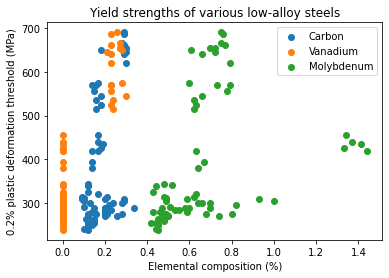

In [85]:
# extract some columns of interest and convert them to integers
carbon = alloys.data[1:,0].astype(float)
vanadium = alloys.data[1:,9].astype(float)
molybdenum = alloys.data[1:,2].astype(float)
yieldStrength = alloys.data[1:,12].astype(float)
alloys.graph(carbon, yieldStrength)
alloys.graph(vanadium, yieldStrength)
alloys.graph(molybdenum, yieldStrength)
plt.title("Yield strengths of various low-alloy steels")
plt.xlabel("Elemental composition (%)")
plt.ylabel("0.2% plastic deformation threshold (MPa)")
plt.gca().legend(("Carbon", "Vanadium", "Molybdenum"))
alloys.show_graph()

It would appear that generally high-carbon steels tend to have higher yield strengths, which is true based on how carbon fits into the iron lattice. The high-vanadium steels also have better yield strengths, but we're not all that sure since a lot of our steels have no vanadium at all. Molybdenum appears to have a pretty strong correlation.

In general, phosphorus and sulfur make steel brittle, without actually increasing strength that much. Let's check those:

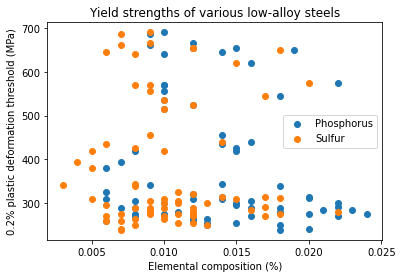

In [86]:
phosphorus = alloys.data[1:,3].astype(float)
sulfur = alloys.data[1:,4].astype(float)
alloys.close_graph()
alloys.graph(phosphorus, yieldStrength)
alloys.graph(sulfur, yieldStrength)
plt.title("Yield strengths of various low-alloy steels")
plt.xlabel("Elemental composition (%)")
plt.ylabel("0.2% plastic deformation threshold (MPa)")
plt.gca().legend(("Phosphorus", "Sulfur"))
alloys.show_graph()

It appears to be the case that phosphorus and sulfur impurities don't help out our steel. In fact, it's hypothesized that sulfur impurities in the rivets and hull plates used to construct the Titanic caused them to split on collision, fatally compromising the ship's structural integrity as hull plates separated or outright shattered.

Now we'd like to standarize our data to a mean of zero and a standard deviation of one.

In [87]:
numbers = np.delete(alloys.data, 0, axis=0)
numbers = numbers.astype(float)
alloys.standardize(numbers)
# append the header back
alloys.standard = np.vstack((alloys.header, alloys.standard))
# print it to show that most things are now small numbers as you'd expect of a standarized array
print(alloys.standard)

[[' C' ' Si' ' Mn' ' P' ' S' ' Ni' ' Cr' ' Mo' ' Cu' 'V' ' Al' ' N'
  ' 0.2% Proof Stress (MPa)']
 ['-0.965424153219939' '0.846628373383849' '-0.559196137845918'
  '-0.9925892073314627' '-1.8913445000133424' '-0.23281408297467204'
  '0.9401900067767262' '0.12528286697952615' '-0.7784238047757686'
  '-0.5737237286866108' '-0.6271743187195189' '-0.5795016547628392'
  '-0.28462659042623906']
 ['-1.4267772883869898' '0.9752301516193705' '-0.6859394387637759'
  '-1.6345031857254613' '-1.3860502365589433' '-0.4277281989534673'
  '0.9614285724868646' '0.016669183384993937' '-0.2765147246815419'
  '-0.5737237286866108' '-0.28377849402137945' '0.03152101051011318'
  '-0.5105238223732094']
 ['-1.2729929099979727' '-0.18218585250032196' '-0.6859394387637759'
  '-1.2065605334627956' '-0.3754617096501456' '-0.5825129381130988'
  '0.7915200468057572' '-0.010484237513638816' '-0.10921169798346653'
  '-0.5737237286866108' '-0.11208058167230975' '0.46796577141936446'
  '-0.5387609763665806']
 ['-0.9654

We now run regression on the data we have, and find the residuals:

In [88]:
# get each individual dataset as an array of floats since adding the header back made them strings
carbon = alloys.standard[1:,0].astype(float)
silicon = alloys.standard[1:,1].astype(float)
manganese = alloys.standard[1:,2].astype(float)
phosphorus = alloys.standard[1:,3].astype(float)
sulfur = alloys.standard[1:,4].astype(float)
nickel = alloys.standard[1:,5].astype(float)
chromium = alloys.standard[1:,6].astype(float)
molybdenum = alloys.standard[1:,7].astype(float)
copper = alloys.standard[1:,8].astype(float)
vanadium = alloys.standard[1:,9].astype(float)
aluminum = alloys.standard[1:,10].astype(float)
nitrogen = alloys.standard[1:,11].astype(float)
# construct list of lists for the elements
elements = [carbon, silicon, manganese, phosphorus, 
            sulfur, nickel, chromium, molybdenum, 
            copper, vanadium, aluminum, nitrogen]
names = ["carbon", "silicon", "manganese", "phosphorus", 
         "sulfur", "nickel", "chromium", "molybdenum", 
         "copper", "vanadium", "aluminum", "nitrogen"]
target = alloys.standard[1:,12].astype(float)
# construct regression list
regressions = []
for element in elements:
    # transform our matrix to [x 1] so that we can do matrix math
    a = np.vstack([np.array(element), np.ones(len(element))]).T
    m, c = alloys.least_squares(a, np.array(target))
    regressions.append([m, c])
print("Residuals: ")
for i in range(len(regressions)):
    print(names[i].capitalize() + ": " + str(alloys.residuals(elements[i], target, regressions[i][0], regressions[i][1])))

Residuals: 
Carbon: 57.137654880777134
Silicon: 68.85468154980107
Manganese: 62.05443797694353
Phosphorus: 70.04942208534389
Sulfur: 71.98744066295544
Nickel: 39.81164278983285
Chromium: 48.75787880178833
Molybdenum: 19.515995792837913
Copper: 59.049528545985495
Vanadium: 11.288785503620876
Aluminum: 71.43974689641568
Nitrogen: 67.64124314520986


From what we have, it seems that vanadium and molybdenum content are most related to increasing yield strength of the steel at room temperature. Unsurprisingly, the common impurities in steel, such as phosphorus (from the flux), sulfur (from the ore), silicon (ditto), aluminum (ditto), and nitrogen (from the air), don't have much of a correlation, though to be fair as impurities they aren't very well-represented in the steel. We can look at the graphs below:

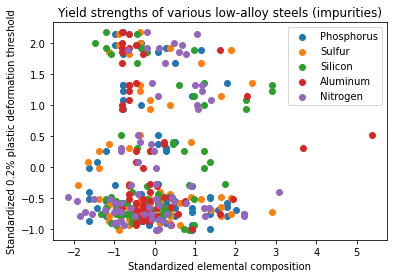

In [89]:
alloys.graph(phosphorus, target)
alloys.graph(sulfur, target)
alloys.graph(silicon, target)
alloys.graph(aluminum, target)
alloys.graph(nitrogen, target)
plt.title("Yield strengths of various low-alloy steels (impurities)")
plt.xlabel("Standardized elemental composition")
plt.ylabel("Standardized 0.2% plastic deformation threshold")
plt.gca().legend(("Phosphorus", "Sulfur", "Silicon", "Aluminum", "Nitrogen"))
alloys.show_graph()

We can also look at elements added to the steel to harden it (such as carbon, vanadium, molybdenum, and manganese). From what we see below, vanadium and molybdenum steels have the strongest correlation between yield strength and amount present. Manganese is a special case; manganese steels in general tend to be both hard and not brittle, but this is generally only true at high concentrations, about 100 times the amount we have in our steel, and we're looking at low-alloy steels. Carbon, being ubiquitous, is predictably all over the place.

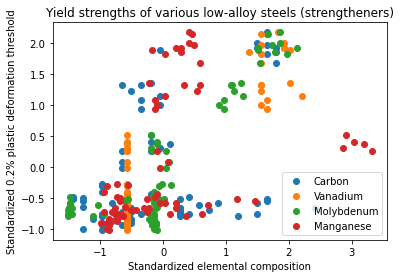

In [90]:
alloys.close_graph()
alloys.graph(carbon, target)
alloys.graph(vanadium, target)
alloys.graph(molybdenum, target)
alloys.graph(manganese, target)
plt.title("Yield strengths of various low-alloy steels (strengtheners)")
plt.xlabel("Standardized elemental composition")
plt.ylabel("Standardized 0.2% plastic deformation threshold")
plt.gca().legend(("Carbon", "Vanadium", "Molybdenum", "Manganese"))
alloys.show_graph()

We can also examine materials that are added to steel for other desirable properties (chromium and nickel are used to make steel stop rusting, for example). In general, most of these elements slightly increase the strength of our steel, but our analysis is complicated by the fact that there isn't a continuous spectrum; take chromium, for instance. You either add none of it, a little bit, or a lot, and there's not really an in-between. Nickel is also all over the place, but it really isn't used for its crystal stabilizing properties, but to make your stuff stop rusting. Copper is used to increase the electrical conductivity, and is itself actually quite ductile, so it would tend to lower the yield strength, but here we see that it is confounded by the alphabet soup of elements we've added to our steels.

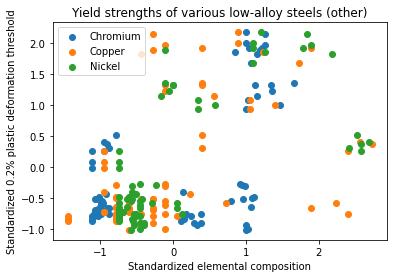

In [91]:
alloys.close_graph()
alloys.graph(chromium, target)
alloys.graph(copper, target)
alloys.graph(nickel, target)
plt.title("Yield strengths of various low-alloy steels (other)")
plt.xlabel("Standardized elemental composition")
plt.ylabel("Standardized 0.2% plastic deformation threshold")
plt.gca().legend(("Chromium", "Copper", "Nickel"))
alloys.show_graph()

We can draw trendlines for individual elements:

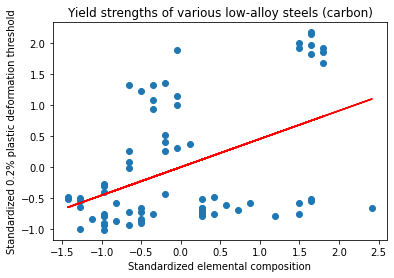

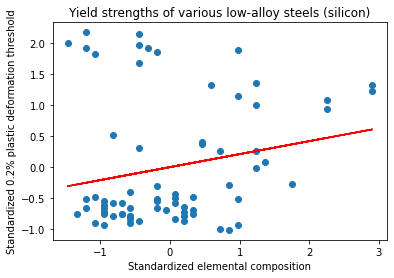

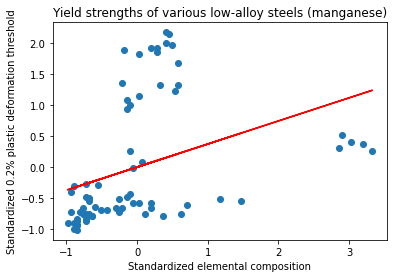

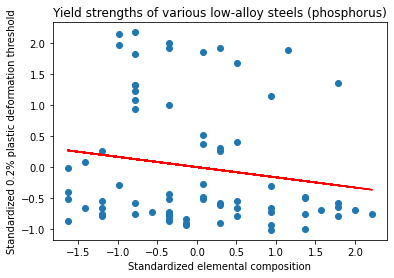

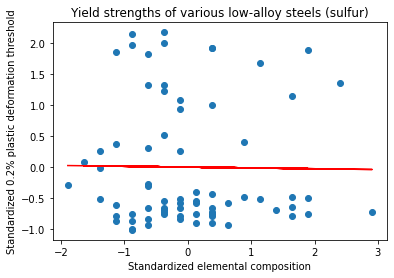

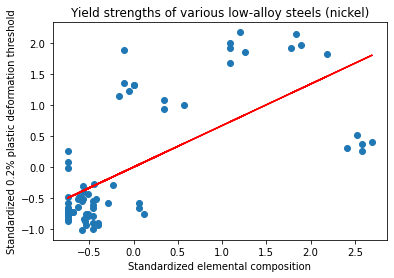

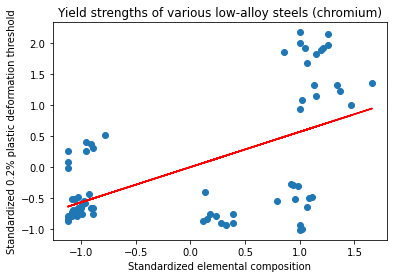

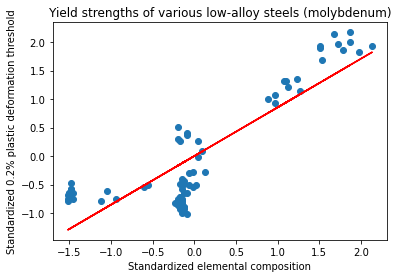

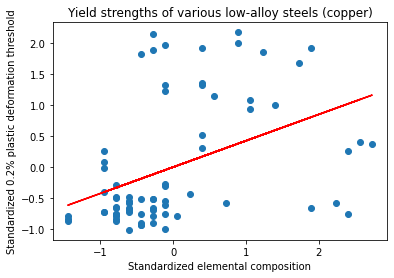

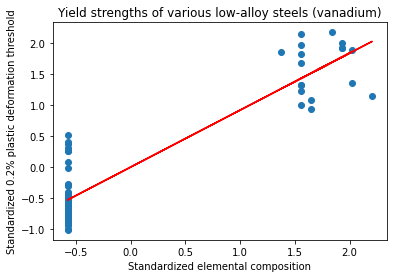

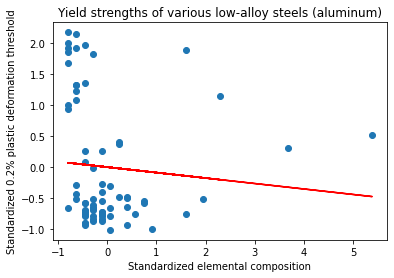

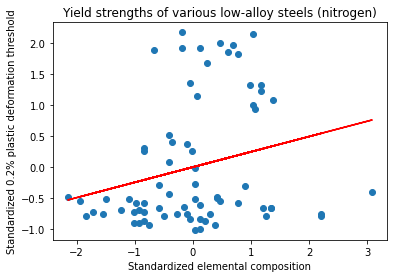

In [92]:
alloys.close_graph()
alloys.graph(carbon, target)
# carbon
trendline = []
for value in carbon:
    trendline.append(regressions[0][0] * value + regressions[0][1])
plt.plot(carbon, trendline, 'r')
plt.title("Yield strengths of various low-alloy steels (carbon)")
plt.xlabel("Standardized elemental composition")
plt.ylabel("Standardized 0.2% plastic deformation threshold")
alloys.show_graph()
alloys.close_graph()
# silicon
alloys.graph(silicon, target)
trendline = []
for value in silicon:
    trendline.append(regressions[1][0] * value + regressions[1][1])
plt.plot(silicon, trendline, 'r')
plt.title("Yield strengths of various low-alloy steels (silicon)")
plt.xlabel("Standardized elemental composition")
plt.ylabel("Standardized 0.2% plastic deformation threshold")
alloys.show_graph()
alloys.close_graph()
# manganese
alloys.graph(manganese, target)
trendline = []
for value in manganese:
    trendline.append(regressions[2][0] * value + regressions[2][1])
plt.plot(manganese, trendline, 'r')
plt.title("Yield strengths of various low-alloy steels (manganese)")
plt.xlabel("Standardized elemental composition")
plt.ylabel("Standardized 0.2% plastic deformation threshold")
alloys.show_graph()
alloys.close_graph()
# phosphorus
alloys.graph(phosphorus, target)
trendline = []
for value in phosphorus:
    trendline.append(regressions[3][0] * value + regressions[3][1])
plt.plot(phosphorus, trendline, 'r')
plt.title("Yield strengths of various low-alloy steels (phosphorus)")
plt.xlabel("Standardized elemental composition")
plt.ylabel("Standardized 0.2% plastic deformation threshold")
alloys.show_graph()
alloys.close_graph()
# sulfur
alloys.graph(sulfur, target)
trendline = []
for value in sulfur:
    trendline.append(regressions[4][0] * value + regressions[4][1])
plt.plot(sulfur, trendline, 'r')
plt.title("Yield strengths of various low-alloy steels (sulfur)")
plt.xlabel("Standardized elemental composition")
plt.ylabel("Standardized 0.2% plastic deformation threshold")
alloys.show_graph()
alloys.close_graph()
# nickel
alloys.graph(nickel, target)
trendline = []
for value in nickel:
    trendline.append(regressions[5][0] * value + regressions[5][1])
plt.plot(nickel, trendline, 'r')
plt.title("Yield strengths of various low-alloy steels (nickel)")
plt.xlabel("Standardized elemental composition")
plt.ylabel("Standardized 0.2% plastic deformation threshold")
alloys.show_graph()
alloys.close_graph()
# chromium
alloys.graph(chromium, target)
trendline = []
for value in chromium:
    trendline.append(regressions[6][0] * value + regressions[6][1])
plt.plot(chromium, trendline, 'r')
plt.title("Yield strengths of various low-alloy steels (chromium)")
plt.xlabel("Standardized elemental composition")
plt.ylabel("Standardized 0.2% plastic deformation threshold")
alloys.show_graph()
# molybdenum
alloys.graph(molybdenum, target)
trendline = []
for value in molybdenum:
    trendline.append(regressions[7][0] * value + regressions[7][1])
plt.plot(molybdenum, trendline, 'r')
plt.title("Yield strengths of various low-alloy steels (molybdenum)")
plt.xlabel("Standardized elemental composition")
plt.ylabel("Standardized 0.2% plastic deformation threshold")
alloys.show_graph()
alloys.close_graph()
# copper
alloys.graph(copper, target)
trendline = []
for value in copper:
    trendline.append(regressions[8][0] * value + regressions[8][1])
plt.plot(copper, trendline, 'r')
plt.title("Yield strengths of various low-alloy steels (copper)")
plt.xlabel("Standardized elemental composition")
plt.ylabel("Standardized 0.2% plastic deformation threshold")
alloys.show_graph()
alloys.close_graph()
# vanadium
alloys.graph(vanadium, target)
trendline = []
for value in vanadium:
    trendline.append(regressions[9][0] * value + regressions[9][1])
plt.plot(vanadium, trendline, 'r')
plt.title("Yield strengths of various low-alloy steels (vanadium)")
plt.xlabel("Standardized elemental composition")
plt.ylabel("Standardized 0.2% plastic deformation threshold")
alloys.show_graph()
alloys.close_graph()
# aluminum
alloys.graph(aluminum, target)
trendline = []
for value in aluminum:
    trendline.append(regressions[10][0] * value + regressions[10][1])
plt.plot(aluminum, trendline, 'r')
plt.title("Yield strengths of various low-alloy steels (aluminum)")
plt.xlabel("Standardized elemental composition")
plt.ylabel("Standardized 0.2% plastic deformation threshold")
alloys.show_graph()
alloys.close_graph()
# nitrogen
alloys.graph(nitrogen, target)
trendline = []
for value in nitrogen:
    trendline.append(regressions[11][0] * value + regressions[11][1])
plt.plot(nitrogen, trendline, 'r')
plt.title("Yield strengths of various low-alloy steels (nitrogen)")
plt.xlabel("Standardized elemental composition")
plt.ylabel("Standardized 0.2% plastic deformation threshold")
alloys.show_graph()
alloys.close_graph()

It would appear that most have a fairly weak correlation due to confounding. Interesting, out of all the impurities, only phosphorus and aluminum have slightly negative trendlines. Sulfur is almost a flat line.

In general, it is very hard to predict the exact physics of a batch of steel without destructive testing, because there are a lot of factors that go into how good your steel is, starting from the ore that came out of the ground. However, as predicted, vanadium and molybdenum steels generally have far better yield strength, so anything that proudly advertises its elemental composition is either living up to its name, or lying about what it actually contains. Because of the amount of confounding variables, there isn't a clear connection between the amount of impurities and the yield strength of the steel, while elements that are added for having other desirable properties show a very weak correlation.

An additional problem lies in the relatively minute quantities involved. Most of the alloying elements are a percent of a percent, and thus even a slight change can be huge.

Finally, we'd like to answer a question: is there a peak between the best strength steel we can get, versus its weight? That is, is there a peak performance? We can calculate the molar mass of a compound by summing up each of its elemental compositions times their percentages, and use iron as the rest. A higher molar mass means that a rough cube of the same size weighs more. We'll use molar mass as the independent variable here.

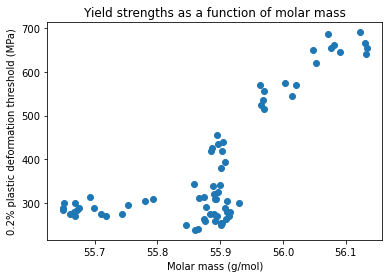

In [93]:
mass = []
# calculate molar mass for each steel
for steel in alloys.data[1:,:-1].astype(float):
    mass.append(alloys.molar_mass(steel))
mass = np.array(mass)
# not needed as it turns out
# steelCodes = np.array(steelCodes)
# graph our relationship
alloys.graph(mass, yieldStrength)
plt.title("Yield strengths as a function of molar mass")
plt.xlabel("Molar mass (g/mol)")
plt.ylabel("0.2% plastic deformation threshold (MPa)")
alloys.show_graph()

Unfortunately, here there is a very clear relationship. You get what you pay for. Unsurprisingly, this is because molybdenum (95.95 g/mol) is one of the major strengtheners, and is nearly twice as heavy as iron (55.85 g/mol), while most of the impurities are lighter than iron. That being said, it's not actually that much of a difference, unless you need to squeeze out every available gram. There is no magic mix of alloys that will get you the optimum hard yet light steel, and if you need something like that, you'll just have to stick to titanium.

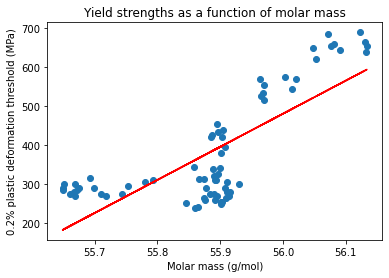

In [94]:
# fit function
a = np.vstack([mass, np.ones(len(mass))]).T
m, c = alloys.least_squares(a, np.array(yieldStrength))
# display the old graph
alloys.graph(mass, yieldStrength)
plt.title("Yield strengths as a function of molar mass")
plt.xlabel("Molar mass (g/mol)")
plt.ylabel("0.2% plastic deformation threshold (MPa)")
trendline = []
for value in mass:
    trendline.append(m * value + c)
plt.plot(mass, trendline, 'r')
alloys.show_graph()

We calculate the residual:

In [95]:
residual = alloys.residuals(mass, yieldStrength, m, c)
print("Residual:", residual)

Residual: 594965.4595118536


All things considered, this is a pretty high residual, indicating a weak relationship between the relative density of the steel and its yield strength, just due to all of the confounding variables making any one thing hard to isolate.

Moral of the story: Sometimes you get what you pay for.